In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TODO: 데이터 불러와서 확인하기기
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# TODO: Null 값 대체하기
# 나이는 평균값으로 나머지는 N 으로 대체

age_mean = titanic_df['Age'].mean()

titanic_df['Age'].fillna(age_mean, inplace=True)
titanic_df.fillna('N', inplace=True)

Null_sum=titanic_df.isnull().sum()

print("데이터 세트 Null 값 갯수", Null_sum)

데이터 세트 Null 값 갯수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [38]:
# 문자열 피처 처리하기
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64
Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [57]:
# TODO: Cabin에서 앞 문자만 추출하기
titanic_df['Cabin'].str[0].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [85]:
# 성별에 따른 생존율
titanic_df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

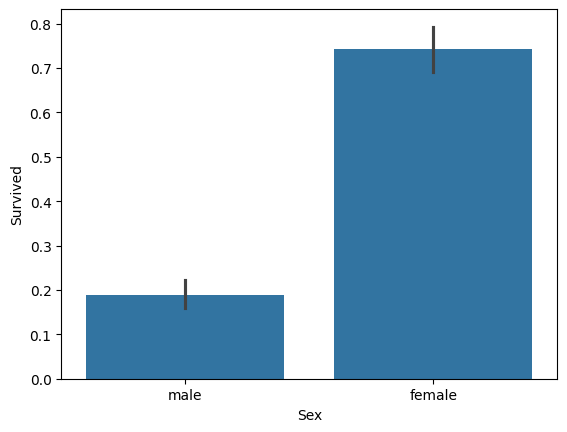

In [87]:
sns.barplot(x='Sex',y="Survived", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

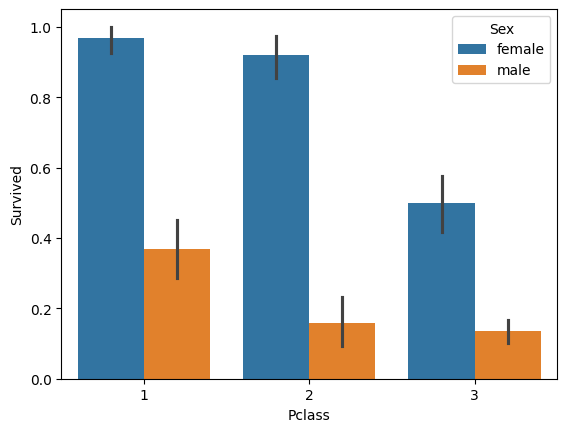

In [90]:
# 객실 등급에 따른 생존율
sns.barplot(x='Pclass',y ='Survived',hue='Sex', data=titanic_df)

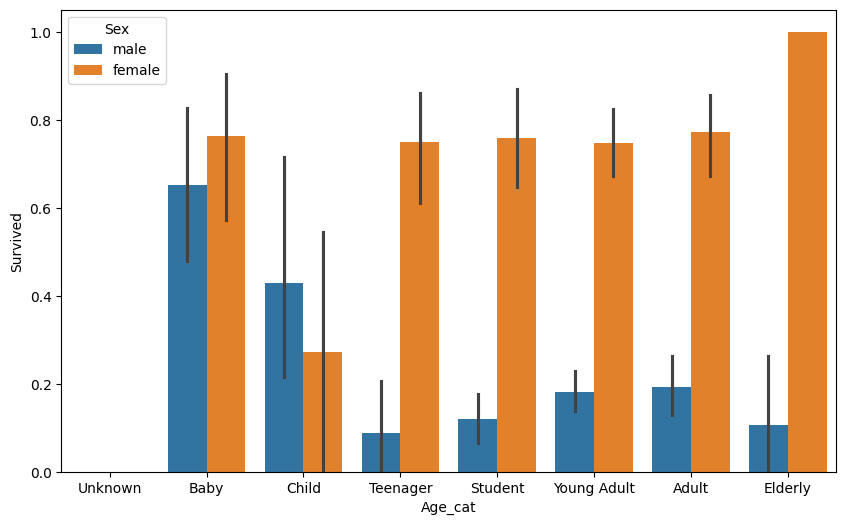

In [91]:
# TODO: 입력 age에 따라 구분값을 반환하는 함수 만들기

def get_category(age):
    cat = ''
    # TODO:
    if age <= -1: cat ="Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else: cat = "Elderly"
    return cat

plt.figure(figsize=(10,6)) 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))# TODO: 나이를 구간별로

# TODO: 그래프로 시각화
sns.barplot(x= 'Age_cat', y = "Survived", hue="Sex", data= titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [94]:
# TODO: 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 ['Cabin', 'Sex', 'Embarked']

from sklearn.preprocessing import LabelEncoder


fes = ['Cabin','Sex','Embarked']
for fe in fes:
    le = LabelEncoder()
    le = le.fit(titanic_df[fe])
    titanic_df[fe] = le.transform(titanic_df[fe])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [100]:
titanic_df.drop(titanic_df[['PassengerId','Name','Ticket']],axis=1,inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,146,3
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,146,3
3,1,1,0,35.000000,1,0,53.1000,55,3
4,0,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,146,3
887,1,1,0,19.000000,0,0,30.0000,30,3
888,0,3,0,29.699118,1,2,23.4500,146,3
889,1,1,1,26.000000,0,0,30.0000,60,0


In [115]:
from sklearn.model_selection import train_test_split

target = titanic_df['Survived']
data = titanic_df.drop(['Survived'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state=5)

In [116]:
# TODO:결정트리, Random Forest, 로지스틱 회귀를 이용해 생존자 예측해보기

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate


models = [DecisionTreeClassifier(random_state=5),
          RandomForestClassifier(random_state=5),
          LogisticRegression(random_state=5)]

models_names = ['Decision','RandomForest','Logistic']

for model, models_names in zip(models, models_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(models_names, "Accuracy: ", accuracy_score(y_test, y_pred))

Decision Accuracy:  0.8435754189944135
RandomForest Accuracy:  0.8324022346368715
Logistic Accuracy:  0.8268156424581006


In [117]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
 
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [ ]:
# TODO: 교차검증으로 결정트리 모델 평가하기

In [ ]:
# TODO: GridSearchCV를 이용하여 하이퍼 파라미터의 최적값을 구하기
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}


